In [1]:
import sys
sys.path.append('/home/campbell/yulee/DAMM/new/code/pro')

from funcs6 import *
import joblib

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
cohort = 'metabric'
ss = 10

In [3]:
analysisProteins = ['Beta-catenin', 'C-myc', 'CAIX', 'CD20', 'CD3', 'CD44', 'CD45', 'CD68', 
                'CK14', 'CK19', 'CK5', 'CK7', 'CK8_18', 'DNA1', 'DNA2', 'EGFR', 'ER', 'E_cadherin', 'EpCAM', 
                'Fibronectin', 'GATA3', 'H3K27me3', 'HER2', 'Ki67', 'PR', 'SMA', 'Slug', 'Sox9', 'Total HH3', 
                'Twist', 'Vimentin',  'cPARP-cCasp3', 'mTOR', 'p-ERK1/2', 'p-HH3', 'p53', 'pS6', 'panCK', 'vWF-CD31']

pretty_printing = ['bCatenin', 'cMyc', 'CAIX', 'CD20', 'CD3', 'CD44', 'CD45', 'CD68', 
                'CK14', 'CK19', 'CK5', 'CK7', 'CK8/18', 'DNA1', 'DNA2', 'EGFR', 'ER', 'ECadherin', 'EpCAM', 
                'Fibronectin', 'GATA3', 'H3K27me3', 'HER2', 'Ki67', 'PR', 'SMA', 'Slug', 'Sox9', 'totHH3', 
                'Twist', 'Vimentin',  'cPARP-cCasp3', 'mTOR', 'ERK', 'pHH3', 'p53', 'pS6', 'panCK', 'vWF', 'size']

tr_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_exp.h5ad'.format(cohort, ss))
te_exp = sc.read_h5ad('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_exp.h5ad'.format(cohort, ss))

#tr_so = torch.load('/home/campbell/yulee/DAMM/new/data/{}/{}k/tr_so.zip'.format(cohort, ss))
#te_so = torch.load('/home/campbell/yulee/DAMM/new/data/{}/{}k/te_so.zip'.format(cohort, ss))

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [4]:
#nc = len(analysisProteins)
batchSize = 128
learnRate = 1e-3
nm = 'student'
rr = 1
rv = 1000 
r = 0

In [5]:
## compute training and test set
trY, trS = prepData(tr_exp, 1, analysisProteins) ## inc cell sizes
teY, teS = prepData(te_exp, 1, analysisProteins) ## inc cell sizes

trFY, trFS, trFL = simulate_data(trY, trS, 1) ## relax rule
teFY, teFS, teFL = simulate_data(teY, teS, 1) ## relax rule

trMat = np.hstack((trY, trS.reshape(-1,1)))
teMat = np.hstack((teY, teS.reshape(-1,1)))
trFMat = np.hstack((trFY, trFS.reshape(-1,1)))
teFMat = np.hstack((teFY, teFS.reshape(-1,1)))
df = ConcatDataset(trY, trS, trFY, trFS, trFL)

# PhenoGraph

In [6]:
'''
if cohort == 'eddy':
    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/phenoYS_center_pn30_0.csv',index_col=0)
    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/fsom1_center_nc15.csv',index_col=0)

    pheno_labels = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/pheno_label_ncY16_ncYS15_pn30_0.csv',index_col=0)
    fsom_labels = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/fsom1_label_nc15.csv',index_col=0)
elif cohort == 'basel':
    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/basel/10k/model5/phenoYS_center_pn30_3.csv',index_col=0)
    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/basel/10k/model5/fsom1_center_nc20.csv',index_col=0)
elif cohort == 'metabric':
    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/metabric/10k/model5/phenoYS_center_pn30_6.csv',index_col=0)
    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/metabric/10k/model5/fsom1_center_nc20.csv',index_col=0)
'''

"\nif cohort == 'eddy':\n    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/phenoYS_center_pn30_0.csv',index_col=0)\n    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/fsom1_center_nc15.csv',index_col=0)\n\n    pheno_labels = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/pheno_label_ncY16_ncYS15_pn30_0.csv',index_col=0)\n    fsom_labels = pd.read_csv('/home/campbell/yulee/DAMM/new/res/eddy/10k/model5/fsom1_label_nc15.csv',index_col=0)\nelif cohort == 'basel':\n    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/basel/10k/model5/phenoYS_center_pn30_3.csv',index_col=0)\n    fsom_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/basel/10k/model5/fsom1_center_nc20.csv',index_col=0)\nelif cohort == 'metabric':\n    pheno_centers = pd.read_csv('/home/campbell/yulee/DAMM/new/res/metabric/10k/model5/phenoYS_center_pn30_6.csv',index_col=0)\n    fsom_centers = pd.read_csv('/home/campbell/yulee/D

In [7]:
#import phenograph
import scanpy.external as sce
pheno_labels, _, _ = sce.tl.phenograph(trMat)
#communities, _, _ = phenograph.cluster(np.hstack((trY, trS.reshape(-1,1))), k=30)
tr_exp.obs['pheno_label'] = pheno_labels.astype(str)

## set number of clusters
nc = len(np.unique(pheno_labels))
pheno_centers = np.zeros((nc, trMat.shape[1]))
for k in range(nc):
    pheno_centers[k,:] = trMat[pheno_labels==k].mean(0)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 3.5829532146453857 seconds
Jaccard graph constructed in 1.7472925186157227 seconds
Wrote graph to binary file in 1.6595659255981445 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.818497
After 6 runs, maximum modularity is Q = 0.820189
Louvain completed 26 runs in 7.285422325134277 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 14.63776969909668 seconds


In [8]:
nc

19

# FlowSOM

In [9]:
from flowsom import flowsom as flowsom
from sklearn.cluster import AgglomerativeClustering

oPath = '/home/campbell/yulee/DAMM/new/res/{}/{}k/ex1/'.format(cohort, ss)
fs_fn = oPath + 'fsom1t_nc{}_{}_rv{}_rr{}_{}.csv'.format(nc, nm, rv, rr, r)
pd.DataFrame(np.array(trMat), columns = pretty_printing).to_csv(fs_fn)
fsom = flowsom(fs_fn, if_fcs=False, if_drop=True, drop_col=['Unnamed: 0'])

#fn = oPath + 'fsom1.csv'
#fsom = flowsom(fn, if_fcs=False, if_drop=True, drop_col=['Unnamed: 0'])

fsom.som_mapping(50, # x_n: e.g. 100, the dimension of expected map
       50, # y_n: e.g. 100, the dimension of expected map
       fsom.df.shape[1],
       1, # sigma: e.g 1, the standard deviation of initialized weights
       0.5, # lr: e.g 0.5, learning rate
       1000, # batch_size: 1000, iteration times
       tf_str=None, # string, e.g. hlog', None, etc - the transform algorithm
       if_fcs=False # bool, whethe the imput file is fcs file. If not, it should be a csv file
       # seed = 10, for reproducing
      )

start = nc; fsom_nc = 0
while fsom_nc < nc:
    print(nc, start, fsom_nc)
    fsom.meta_clustering(AgglomerativeClustering, min_n=start, max_n=start, verbose=True, iter_n=10) # train the meta clustering for cluster in range(40,45)  

    fsom.labeling()
    #fsom.bestk # the best number of clusters within the range of (min_n, max_n)
    fsom_class = np.unique(fsom.df['category'])
    fsom_nc = len(fsom_class)
    start += 1

#fsom.meta_clustering(AgglomerativeClustering, min_n=start, max_n=start, verbose=True, iter_n=5)

fsom_labels = np.array(fsom.df['category'])
tr_exp.obs['fsom_label'] = fsom_labels.astype(str)

fsom_centers = np.zeros((max(fsom_class)+1, fsom.df.shape[1]))
for row in range(max(fsom_class)+1):
    fsom_centers[row,:] = fsom.df[fsom_labels==row].mean(0)

fsom_sorted_by_count = pd.Series(fsom_labels).value_counts().index
fsom_centers = fsom_centers[fsom_sorted_by_count]

fs_centers = fsom_centers[:,:-1]
#pd.DataFrame(fs_centers, columns = fsom.df.columns[:-1])
#pd.DataFrame(out_center, columns = fsom.df.columns[:-1]).to_csv(oName)
#fsom.df['category'].to_csv(oPath + 'fsom{}_label_nc{}.csv'.format(cs, fsom_nc))

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 15.292060005271953

...ready!
19 19 0
0 samples done...


# Random Forest

In [10]:
## run random forest
rf = RandomForestClassifier()
rf.fit(trFMat, trFL)

## save classifiers
#joblib.dump(rf, orf_classifier)

## compute random forest performance of simulated data (confusion matrix)
rf_p_fake_singlet = rf.predict_proba(teFMat)[:,1]
rtn, rfp, rfn, rtp, racc, rf1, rsens, rspec = evalM(rf_p_fake_singlet, teFL)

In [11]:
rf1

0.7972780824700386

# Kmeans Initalization

In [12]:
## damm initialization
Theta0, okms_labels, okms_centers = kmeans_init1(trMat, 1, nc) ## inc cell sizes

## save kmeans results as damm initialization
#torch.save(Theta, output_theta0)

## save kmeans labels (in anndata object)
tr_exp.obs['kms_label'] = okms_labels.astype(str)

## save kmeans centers
okms_sorted_by_count = pd.Series(okms_labels).value_counts().index
okms_centers = okms_centers[okms_sorted_by_count]
#pd.DataFrame(okms_centers, columns = pretty_printing).to_csv(ookms_centers)

## RF on Kmeans

In [13]:
#singlet_indices = np.where(rf.predict_proba(okms_centers)[:,0] <= 0.5)[0]
#Theta1 = {k: v.detach()[singlet_indices].requires_grad_(True) for (k,v) in Theta0.items()}
#Theta1['is_tau'] = Theta1['is_tau'].detach()[:,np.r_[singlet_indices]].requires_grad_(True)

# DAMM

In [14]:
loss, Theta1 = trainWFD(df, rr, Theta0, batchSize, nm, learnRate, rv)

/home/campbell/yulee/DAMM/new/code/pro/funcs6.py:223: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  ccmax = torch.combinations(psi).max(1).values


## Loss Curve

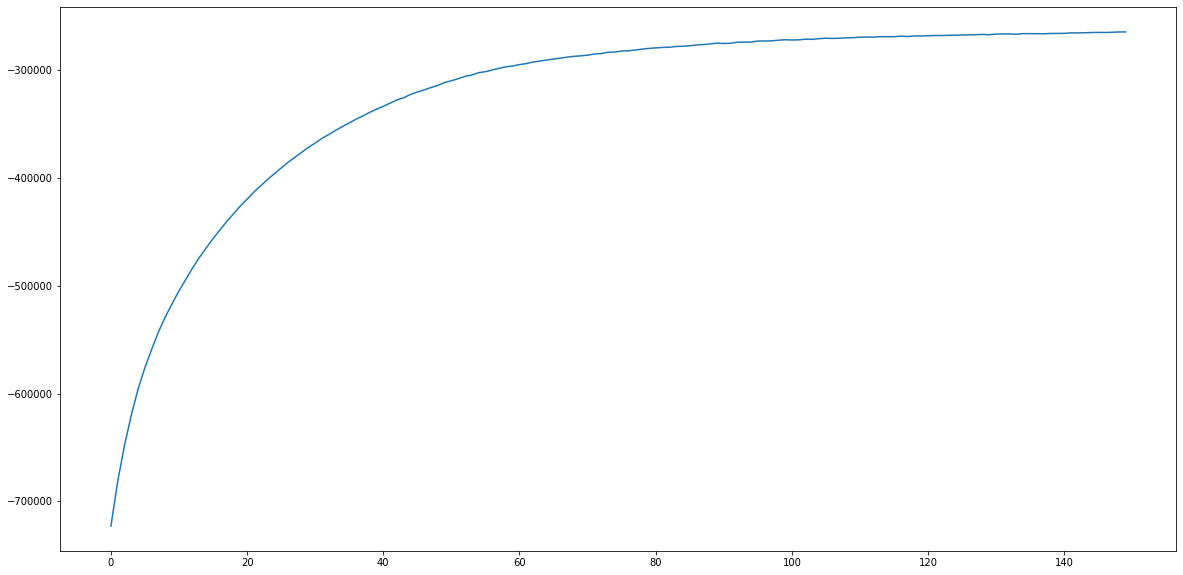

In [15]:
## total loss
plt.plot(np.array(loss)[:,0])

## Label

In [16]:
## output model parameters
#torch.save([loss, Theta], output_theta1)

## damm's doublet performance
with torch.no_grad():
    
    pred_loader = torch.utils.data.DataLoader(ConcatDataset(teFY, teFS), batch_size = 5000, shuffle = False)
    
    damm_p_fake_singlets = []
    for i, bat in enumerate(pred_loader):
        _, _, _ , damm_p_fake_singlet = compute_posteriors_nll_p_singlet(bat[0], bat[1], Theta1, nm, rr)
        damm_p_fake_singlets.append(damm_p_fake_singlet)
        
    ## compute damm performance of simulated data (confusion matrix)
    dtn, dfp, dfn, dtp, dacc, df1, dsens, dspec = evalM(torch.hstack(damm_p_fake_singlets), teFL)
    
    iter_out = [nc, nm, rv, rr, r, 
        rtn, rfp, rfn, rtp, racc, rf1, rsens, rspec,
        dtn, dfp, dfn, dtp, dacc, df1, dsens, dspec]

    ## output doublet performances
    #pd.Series(iter_out).to_csv(odoublet_performance)
    
    ## DAMM label
    damm_pred_singlet_label, damm_pred_singlet_cluster_assig_label, _ = get_assign_labels1(trY, trS, rr, Theta1, nm)    
    damm_sorted_by_count = pd.Series(damm_pred_singlet_cluster_assig_label).value_counts().index
    
    ## save damm labels
    tr_exp.obs['damm_label'] = 50
    tr_exp.obs.iloc[np.where(damm_pred_singlet_label == 0)[0],-1] = np.array(damm_pred_singlet_cluster_assig_label)
    tr_exp.obs['damm_label'] = tr_exp.obs['damm_label'].astype(str)
    
    ## save damm centers
    damm_centers = np.array(torch.hstack([Theta1['log_mu'], Theta1['log_psi'].reshape(-1,1)]).exp())
    
    if len(damm_sorted_by_count) != nc:
        damm_sorted_by_count = np.hstack((damm_sorted_by_count, np.setdiff1d(range(nc), damm_sorted_by_count)))
    damm_centers = damm_centers[damm_sorted_by_count]
    #pd.DataFrame(damm_centers, columns = pretty_printing).to_csv(odamm_centers)

    ## output phenograph/kmeans/damm labels
    #tr_exp.obs.iloc[:,5:].to_csv(olabels)

## Doublet Probability

... storing 'pheno_label' as categorical
... storing 'fsom_label' as categorical
... storing 'kms_label' as categorical
... storing 'damm_label' as categorical


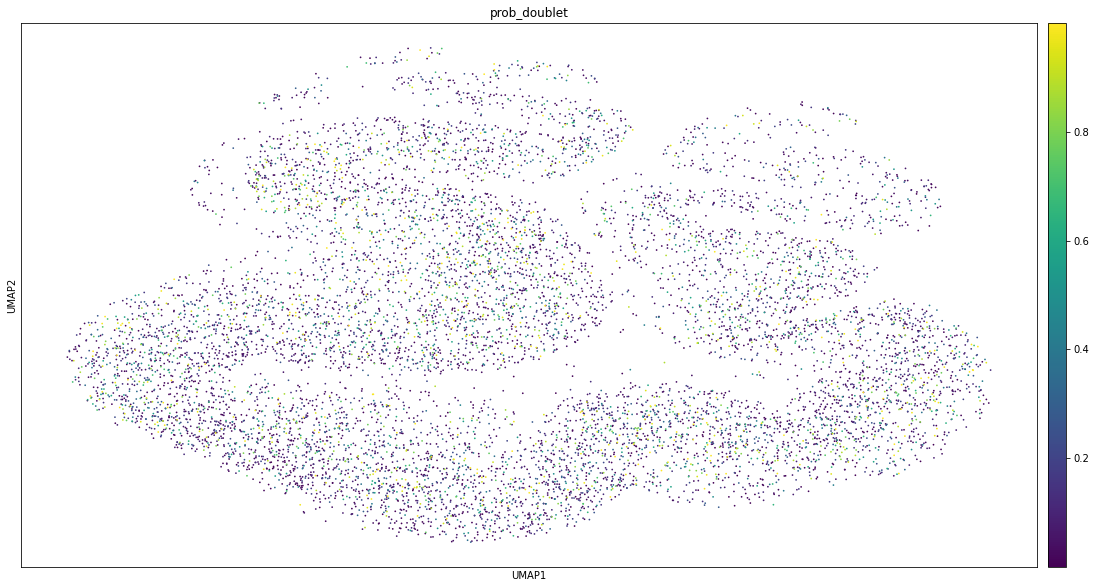

In [17]:
with torch.no_grad():
    _, _, _, p_singlet = compute_posteriors_nll_p_singlet(trY, trS, Theta1, nm, rr)
    
tr_exp.obs['prob_doublet'] = 1 - np.array(p_singlet.detach())
sc.pl.umap(tr_exp, color="prob_doublet")

In [18]:
sum(p_singlet.detach() > 0.5)

tensor(8108)

In [19]:
pd.DataFrame(pheno_centers, columns = pretty_printing)

,bCatenin,cMyc,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,...,Vimentin,cPARP-cCasp3,mTOR,ERK,pHH3,p53,pS6,panCK,vWF,size
0,0.687851,0.399260,0.517649,0.217478,0.155828,7.360421,0.340286,0.301540,0.119649,0.877704,...,0.300201,1.772504,0.348171,0.277758,0.356977,0.149879,0.428746,3.701991,0.708923,94.817538
1,0.605108,0.333808,0.475795,0.180435,0.122272,5.529863,0.282389,0.237418,0.111797,0.648474,...,0.369099,1.512969,0.308110,0.249935,0.304740,0.131431,0.375380,2.070605,0.636076,48.778961
2,0.537793,0.342530,0.542573,0.191002,0.186640,9.622269,0.423823,0.432992,0.114799,0.391209,...,0.456646,1.490304,0.289729,0.267014,0.294646,0.129006,0.437900,1.243687,0.645283,64.203966
3,0.579302,0.316762,0.506549,0.169643,0.107294,6.002467,0.255367,0.260004,0.098602,0.752526,...,0.287451,1.493797,0.301674,0.225015,0.302713,0.128848,0.383536,2.630933,0.629809,120.042460
4,0.522376,0.288227,0.377346,0.145612,0.097048,4.253108,0.218662,0.230650,0.097153,0.781575,...,0.257817,1.362459,0.283142,0.218799,0.245307,0.114244,0.313322,2.711121,0.537327,35.101190
5,0.534184,0.282611,0.414883,0.135734,0.107954,6.165612,0.275763,0.289678,0.102591,0.547940,...,0.466388,1.395843,0.259289,0.237742,0.244557,0.099361,0.338222,1.772368,0.590306,17.022838
6,0.561594,0.285286,0.408830,0.170590,0.119763,5.036757,0.266330,0.230838,0.097929,0.692446,...,0.292106,1.431617,0.297830,0.226828,0.287571,0.122613,0.345003,2.668380,0.586853,138.861111
7,0.513184,0.272333,0.365435,0.140215,0.101054,5.455954,0.247797,0.253796,0.110111,0.490978,...,0.408931,1.316725,0.260621,0.225828,0.253237,0.102744,0.345407,1.579784,0.558636,78.298635
8,0.686938,0.382487,0.513592,0.206025,0.128822,6.194253,0.277091,0.273802,0.122706,1.050537,...,0.283762,1.742354,0.360290,0.281241,0.354437,0.151705,0.434995,4.414873,0.693872,168.316667
9,0.727232,0.369887,0.483581,0.236705,0.196392,7.025633,0.464573,0.273535,0.140797,0.867694,...,0.286620,1.692780,0.364749,0.276236,0.382259,0.150868,0.437504,2.967819,0.712661,39.474187


In [20]:
pd.DataFrame(fs_centers, columns = fsom.df.columns[:-1])

,bCatenin,cMyc,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,...,Vimentin,cPARP-cCasp3,mTOR,ERK,pHH3,p53,pS6,panCK,vWF,size
0,0.553035,0.329162,0.501681,0.168510,0.149155,7.622739,0.349034,0.360217,0.112404,0.529872,...,0.433825,1.465649,0.286477,0.265527,0.275507,0.120947,0.388395,1.824916,0.627172,59.922827
1,0.673220,0.372130,0.476893,0.205208,0.130189,6.431407,0.295537,0.254545,0.121200,0.928092,...,0.303702,1.686450,0.341756,0.251285,0.338523,0.141841,0.423387,3.365938,0.682785,82.427337
2,0.573826,0.323369,0.469411,0.172910,0.146084,7.267269,0.323658,0.306591,0.113961,0.610066,...,0.366490,1.495761,0.296762,0.262248,0.302759,0.127895,0.356526,2.095807,0.625109,110.184426
3,0.649183,0.398296,0.529270,0.198718,0.139960,7.045118,0.308747,0.319438,0.133416,0.853456,...,0.308637,1.680484,0.334710,0.255146,0.324736,0.145768,0.389646,3.171351,0.669936,36.153846
4,0.570756,0.301835,0.414488,0.172112,0.120333,5.723475,0.270365,0.273604,0.101630,0.740255,...,0.297337,1.452938,0.303642,0.248001,0.296547,0.124573,0.362619,2.889715,0.599565,144.538244
5,0.729680,0.399750,0.532899,0.201160,0.117401,5.932486,0.265339,0.246270,0.112310,1.150438,...,0.239088,1.816257,0.368250,0.263712,0.360811,0.150686,0.459501,4.704601,0.728133,113.310811
6,0.618717,0.327023,0.477815,0.184153,0.123308,5.784890,0.267246,0.232482,0.105175,0.847407,...,0.283724,1.592102,0.324701,0.252201,0.330227,0.136882,0.403110,3.482688,0.644180,178.403481
7,0.604749,0.308685,0.424600,0.187674,0.171133,6.846225,0.386006,0.297911,0.116942,0.707458,...,0.295796,1.483770,0.310802,0.262200,0.317358,0.127783,0.364775,2.288605,0.623858,82.516569
8,0.528574,0.330962,0.456727,0.169040,0.147076,9.177691,0.343347,0.374951,0.118095,0.523458,...,0.429881,1.501727,0.290935,0.239204,0.269065,0.119027,0.389034,1.750233,0.605432,20.220779
9,0.667789,0.366680,0.478060,0.238801,0.150613,6.198137,0.363314,0.200934,0.111240,0.760141,...,0.202313,1.670330,0.355468,0.225377,0.374776,0.159678,0.391591,2.682173,0.679235,42.698113


In [21]:
pd.DataFrame(okms_centers, columns = pretty_printing)

,bCatenin,cMyc,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,...,Vimentin,cPARP-cCasp3,mTOR,ERK,pHH3,p53,pS6,panCK,vWF,size
0,0.564106,0.332036,0.482674,0.163104,0.127702,6.632562,0.291425,0.314450,0.113115,0.655967,...,0.372060,1.486458,0.296366,0.249836,0.271269,0.126092,0.359265,2.324586,0.621801,39.644928
1,0.601700,0.350558,0.523776,0.177110,0.128973,7.330848,0.314735,0.320264,0.113156,0.734278,...,0.367990,1.546068,0.308152,0.257755,0.292258,0.125821,0.417922,2.687189,0.640041,59.989507
2,0.625097,0.346008,0.433553,0.181824,0.121870,6.387500,0.283888,0.246997,0.111214,0.839276,...,0.323449,1.612750,0.321687,0.242226,0.309579,0.131241,0.406884,3.158275,0.646193,82.774463
3,0.625392,0.354459,0.498901,0.189222,0.132399,6.702845,0.295206,0.288673,0.103601,0.876397,...,0.294450,1.638880,0.325132,0.255938,0.328868,0.135536,0.412407,3.267652,0.668487,109.252264
4,0.660751,0.385189,0.537649,0.214913,0.166441,7.579304,0.378475,0.361385,0.109163,0.822748,...,0.348856,1.680737,0.350420,0.273602,0.347718,0.148503,0.402094,2.755749,0.697920,60.221333
5,0.526603,0.286732,0.394585,0.140624,0.120179,7.186142,0.295846,0.326082,0.106543,0.602150,...,0.416380,1.405451,0.261769,0.239769,0.243914,0.105273,0.350373,1.966933,0.568383,17.471248
6,0.636535,0.381600,0.528341,0.224555,0.165829,7.235630,0.358638,0.282029,0.141561,0.650937,...,0.346046,1.623005,0.336928,0.255184,0.343545,0.147772,0.384184,2.283271,0.680012,29.838527
7,0.664859,0.374450,0.496125,0.205473,0.157726,7.081452,0.342667,0.290803,0.138913,0.767913,...,0.323754,1.648270,0.332124,0.272738,0.347156,0.145110,0.407679,2.839943,0.677718,87.934097
8,0.613212,0.328449,0.478913,0.180632,0.115423,5.816665,0.260770,0.258461,0.104493,0.789859,...,0.300051,1.527293,0.312740,0.244050,0.308639,0.131694,0.370128,3.220196,0.636874,134.821372
9,0.597776,0.327648,0.445105,0.171067,0.146899,6.889627,0.330321,0.284716,0.119507,0.647571,...,0.328724,1.519695,0.307717,0.261681,0.308843,0.133331,0.377022,2.238125,0.637163,112.085890


In [22]:
#pd.DataFrame(okms_centers[singlet_indices], columns = pretty_printing)

In [23]:
pd.DataFrame(damm_centers, columns = pretty_printing)

,bCatenin,cMyc,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,...,Vimentin,cPARP-cCasp3,mTOR,ERK,pHH3,p53,pS6,panCK,vWF,size
0,0.267571,0.103105,0.120446,0.048026,0.048093,3.743888,0.172483,0.112592,0.035713,0.130736,...,0.242863,0.764805,0.139749,0.129069,0.122794,0.049838,0.125891,0.230141,0.321633,61.403845
1,0.532516,0.331644,0.320550,0.123170,0.083322,8.569287,0.264464,0.201606,0.073151,0.204852,...,0.456200,1.472227,0.269125,0.245172,0.297476,0.100880,0.275847,0.331678,0.644016,50.278984
2,0.452508,0.187273,0.241998,0.141686,0.060082,2.405614,0.159639,0.097496,0.068663,0.486595,...,0.020642,1.330546,0.276254,0.102267,0.262724,0.106114,0.145578,2.272577,0.479306,45.558002
3,0.689442,0.339823,0.427692,0.221406,0.092725,3.775514,0.241221,0.137239,0.092400,0.613250,...,0.028349,1.864226,0.386855,0.176653,0.395559,0.141721,0.256836,3.591521,0.704568,45.992976
4,0.313577,0.100424,0.157036,0.073219,0.038509,1.720162,0.099840,0.056031,0.037555,0.227440,...,0.020989,0.892403,0.186694,0.075018,0.149543,0.065872,0.119986,1.028444,0.311410,56.342224
5,1.013322,0.574197,0.600015,0.333728,0.146787,5.660160,0.336796,0.165975,0.133051,1.134106,...,0.036129,2.461894,0.521054,0.279090,0.575408,0.205941,0.492435,5.690040,1.015155,52.436700
6,0.816427,0.547289,0.483121,0.212029,0.136830,12.394013,0.401898,0.357631,0.102114,0.353386,...,0.850715,2.035667,0.377039,0.374041,0.399334,0.148643,0.540497,0.819199,0.956861,41.901571
7,1.554486,1.047721,0.976101,0.509954,0.235517,9.775138,0.521521,0.277986,0.215582,1.777475,...,0.089191,3.522255,0.765411,0.447960,0.782618,0.337593,0.761629,8.949295,1.578532,69.015798
8,0.460532,0.137355,0.192051,0.077809,0.141004,5.899901,0.151743,0.174466,0.070207,0.204695,...,0.523264,1.000814,0.238697,0.192889,0.196726,0.112415,0.258941,0.457357,0.494804,114.982753
9,0.773964,0.550412,0.661229,0.291322,0.338418,20.989802,0.961346,0.606716,0.116237,0.268718,...,0.872792,2.306489,0.443385,0.503646,0.438086,0.173883,0.451448,0.607963,1.200169,86.196664


# Expression Heatmap (scaled)

In [24]:
scaler = MinMaxScaler()
#s2 = scaler.fit(np.vstack([pheno_centers, fsom_centers, okms_centers, okms_centers[singlet_indices], damm_centers]))
s2 = scaler.fit(np.vstack([pheno_centers, fs_centers, okms_centers, damm_centers]))

#s2 = scaler.fit(np.vstack([pheno_centers, fs_centers, damm_centers]))

## PhenoGraph

Text(156.0, 0.5, 'Cluster')

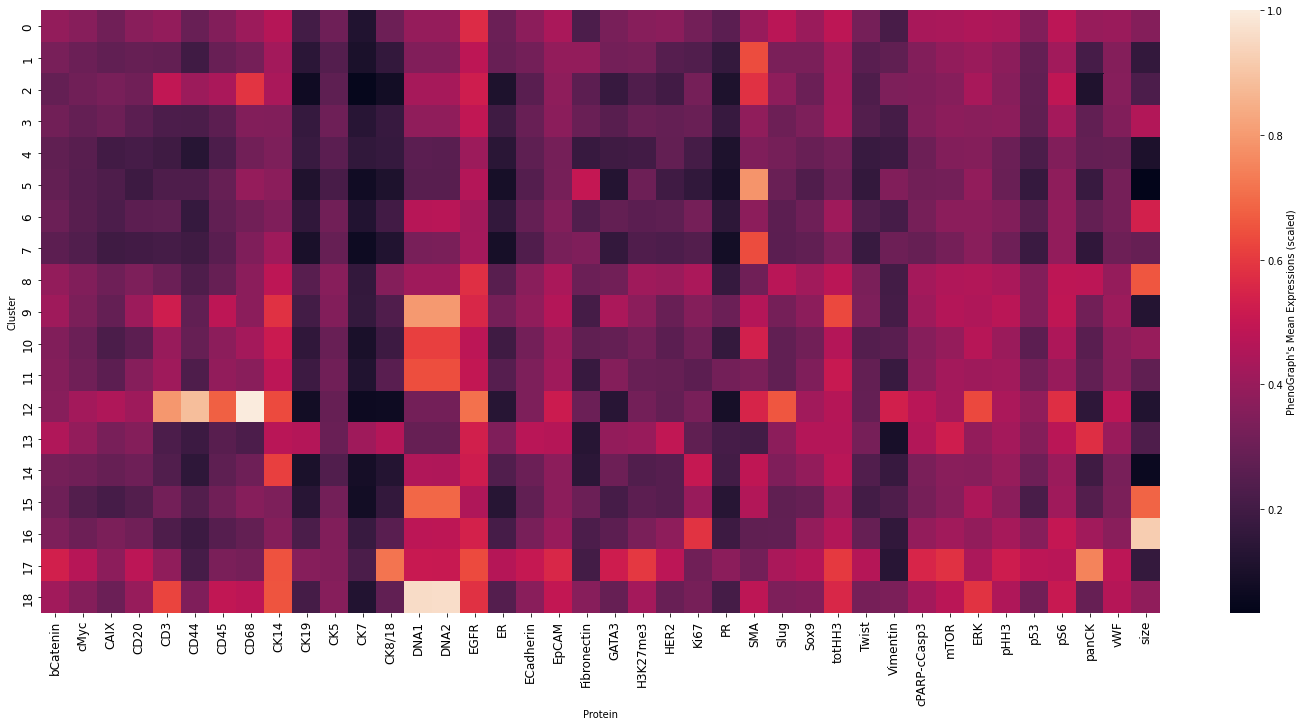

In [25]:
s3 = scaler.transform(pheno_centers)
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "PhenoGraph's Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")

### Doublet Prob

In [26]:
rf.predict_proba(pheno_centers)[:,0]

array([1.  , 0.86, 0.92, 0.97, 0.6 , 0.51, 0.99, 1.  , 1.  , 0.49, 1.  ,
       0.95, 0.55, 0.86, 0.57, 1.  , 1.  , 0.75, 0.71])

## FlowSOM

Text(156.0, 0.5, 'Cluster')

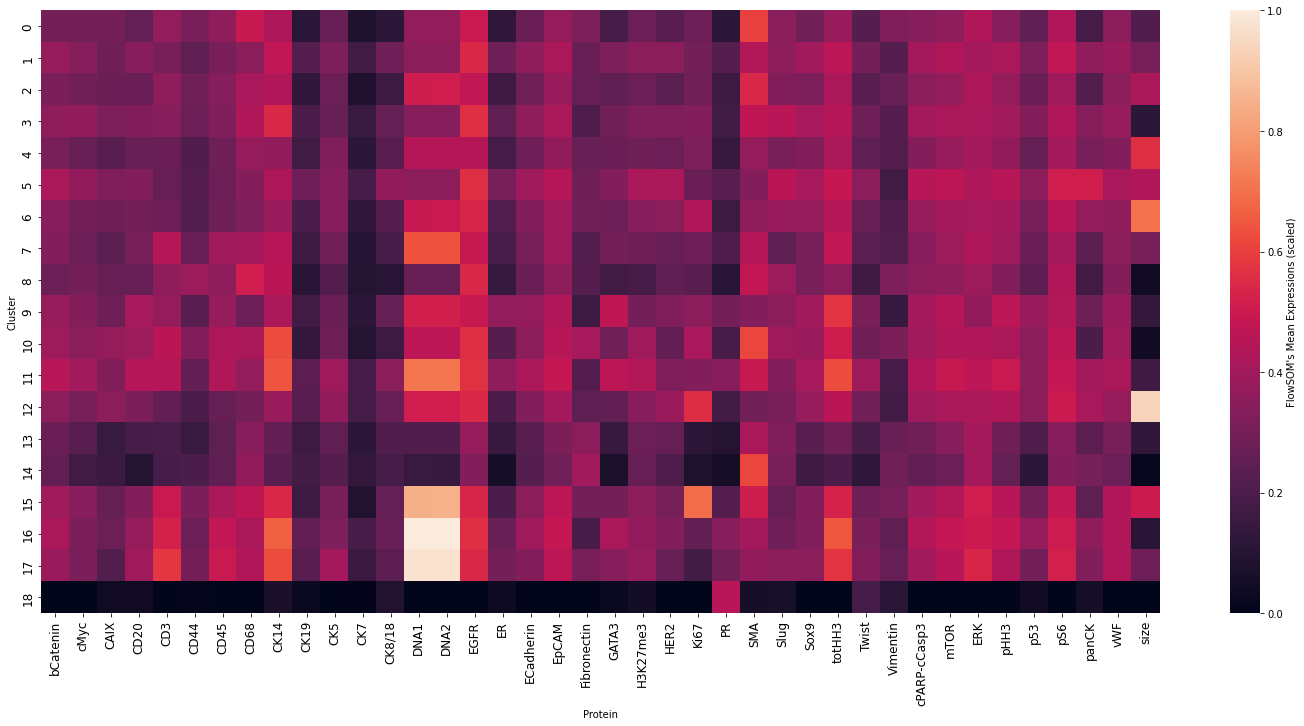

In [27]:
s3 = scaler.transform(fs_centers)
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "FlowSOM's Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")

### Doublet Prob

In [28]:
rf.predict_proba(fs_centers)[:,0]

array([0.92, 0.98, 1.  , 0.75, 1.  , 0.99, 1.  , 0.97, 0.58, 0.68, 0.57,
       0.69, 1.  , 0.63, 0.52, 0.92, 0.42, 0.65, 0.2 ])

## Kmeans

Text(156.0, 0.5, 'Cluster')

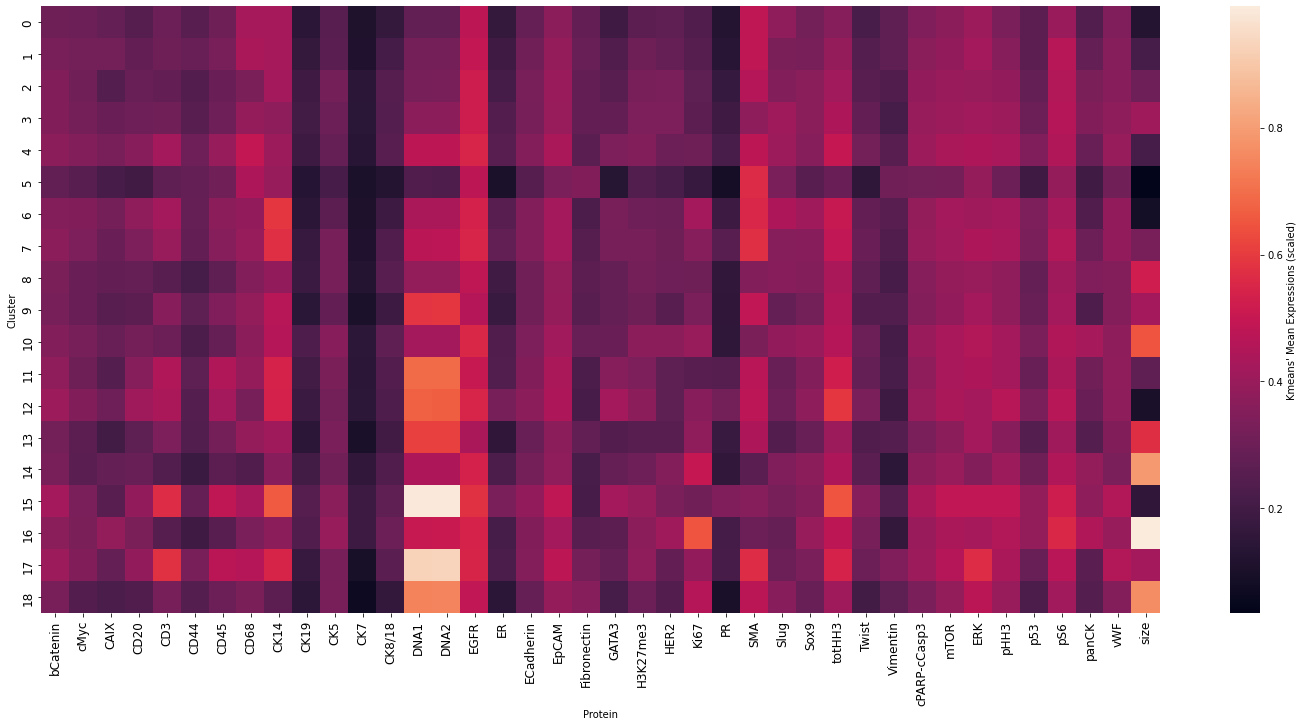

In [29]:
s3 = scaler.transform(okms_centers)
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "Kmeans' Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")

### Doublet Prob

In [30]:
rf.predict_proba(okms_centers)[:,0]

array([0.66, 0.99, 0.99, 1.  , 0.95, 0.56, 0.64, 0.99, 1.  , 1.  , 1.  ,
       0.95, 0.55, 1.  , 1.  , 0.54, 1.  , 0.75, 0.97])

# RF on Kmeans

In [31]:
'''
s3 = scaler.transform(okms_centers[singlet_indices])
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "RF on Kmeans' Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")
'''

'\ns3 = scaler.transform(okms_centers[singlet_indices])\nmat = pd.DataFrame(s3, columns = pretty_printing)\nax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={\'label\': "RF on Kmeans\' Mean Expressions (scaled)"})\nax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = \'center\')\nax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = \'center\')\nax.figure.tight_layout()\nplt.xlabel("Protein")\nplt.ylabel("Cluster")\n'

In [32]:
#rf.predict_proba(okms_centers[singlet_indices])[:,0]

## DAMM

Text(156.0, 0.5, 'Cluster')

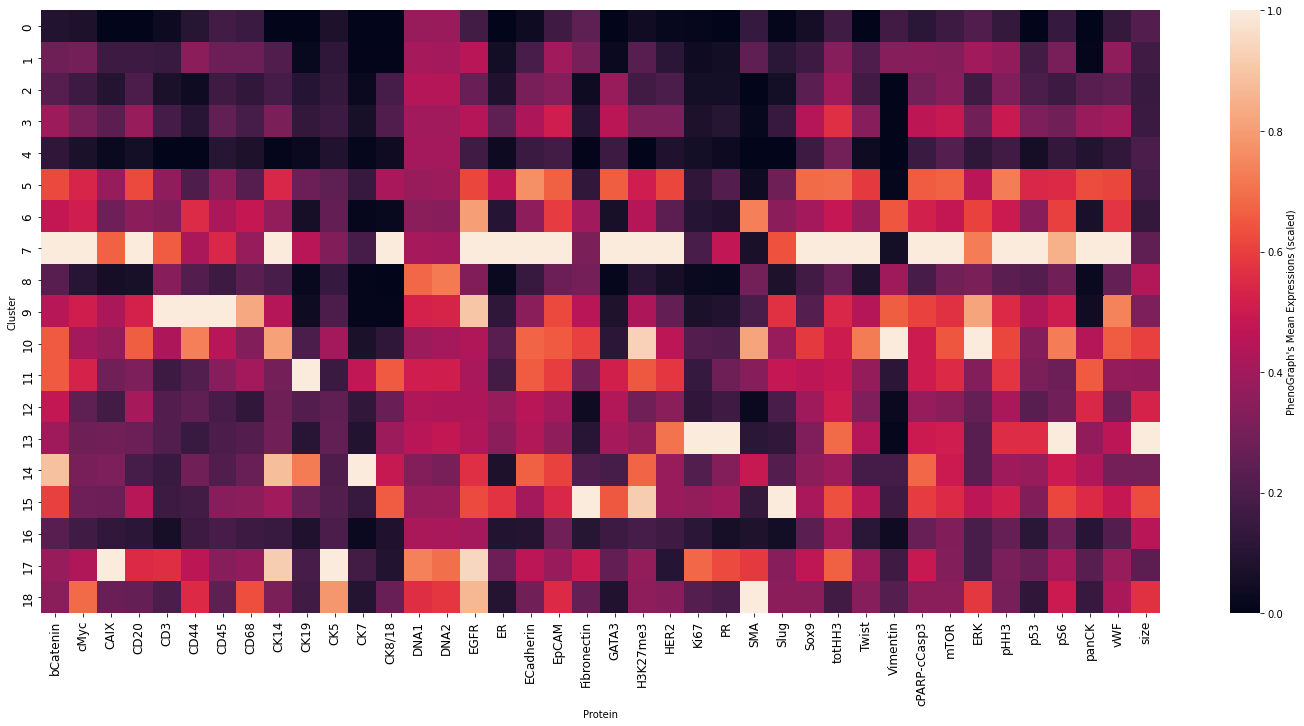

In [33]:
s3 = scaler.transform(damm_centers)
mat = pd.DataFrame(s3, columns = pretty_printing)
ax = sns.heatmap(mat, yticklabels = True, xticklabels = True, cbar_kws={'label': "PhenoGraph's Mean Expressions (scaled)"})
ax.set_xticklabels(ax.get_xticklabels(), size = 12, horizontalalignment = 'center')
ax.set_yticklabels(ax.get_yticklabels(), size = 12, verticalalignment = 'center')
ax.figure.tight_layout()
plt.xlabel("Protein")
plt.ylabel("Cluster")

### Doublet Prob

In [34]:
rf.predict_proba(damm_centers)[:,0]

array([0.35, 0.31, 0.18, 0.32, 0.08, 0.29, 0.34, 0.31, 0.6 , 0.36, 0.97,
       0.91, 0.9 , 0.92, 0.84, 1.  , 0.86, 0.82, 0.94])

# UMAP of PhenoGraph/FlowSOM/Kmeans/DAMM clusters

In [35]:
## compute neighbors for UMAP
sc.pp.neighbors(tr_exp, use_rep='X')
sc.tl.umap(tr_exp)

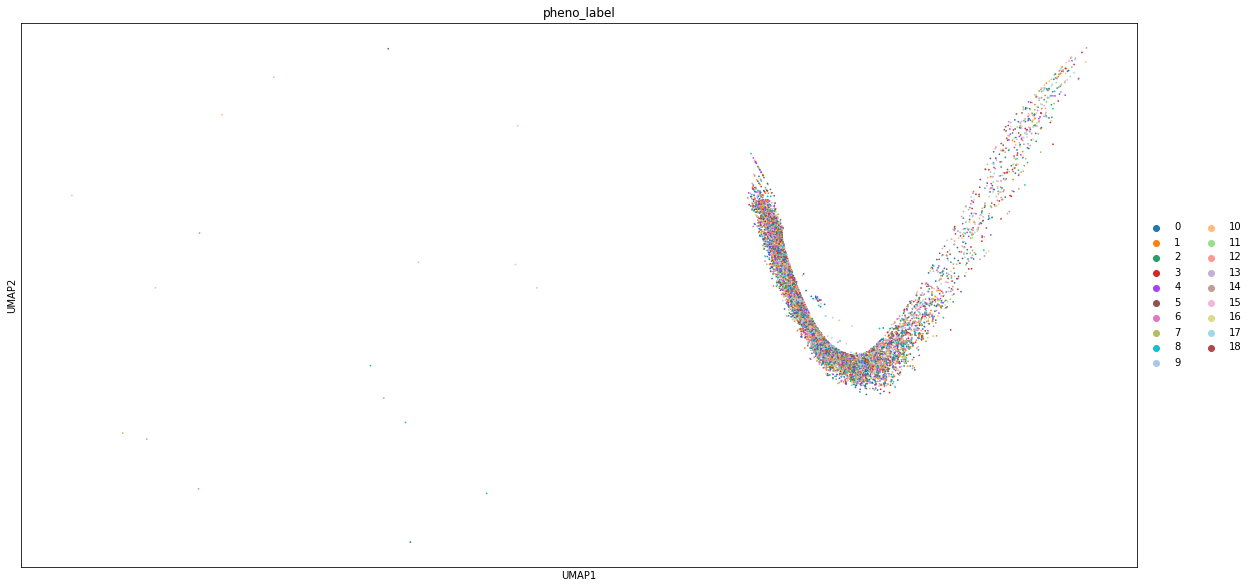

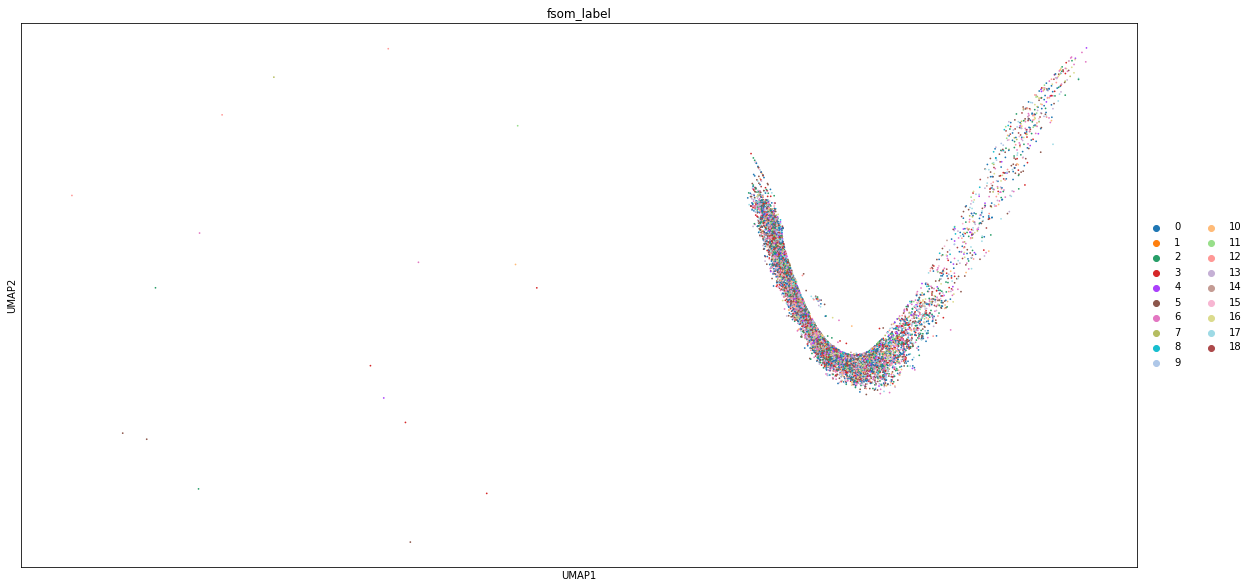

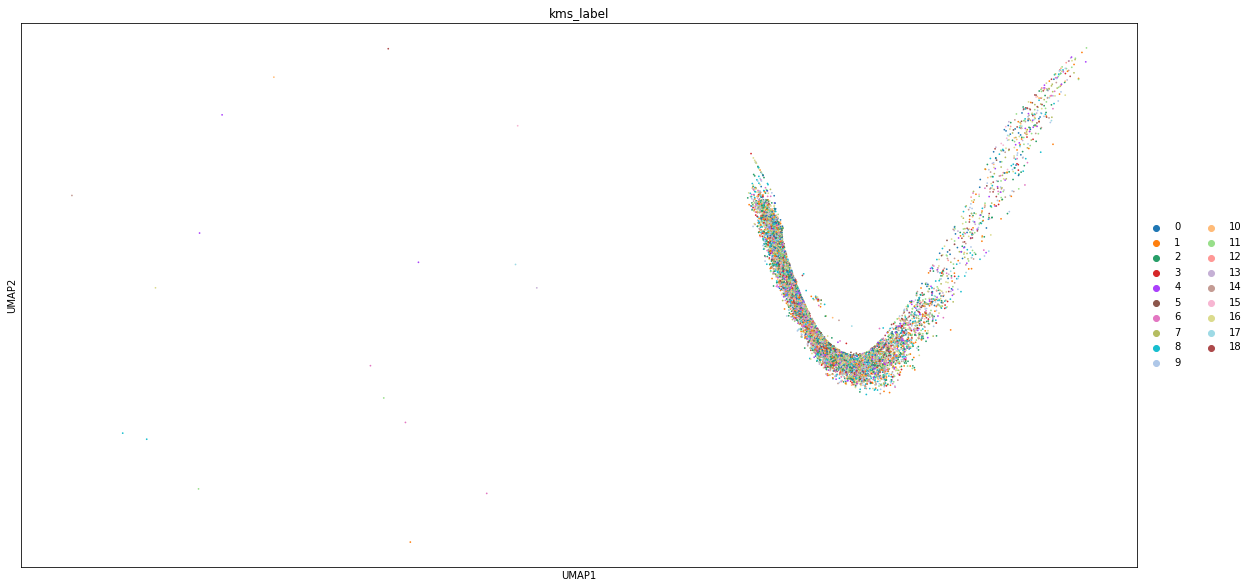

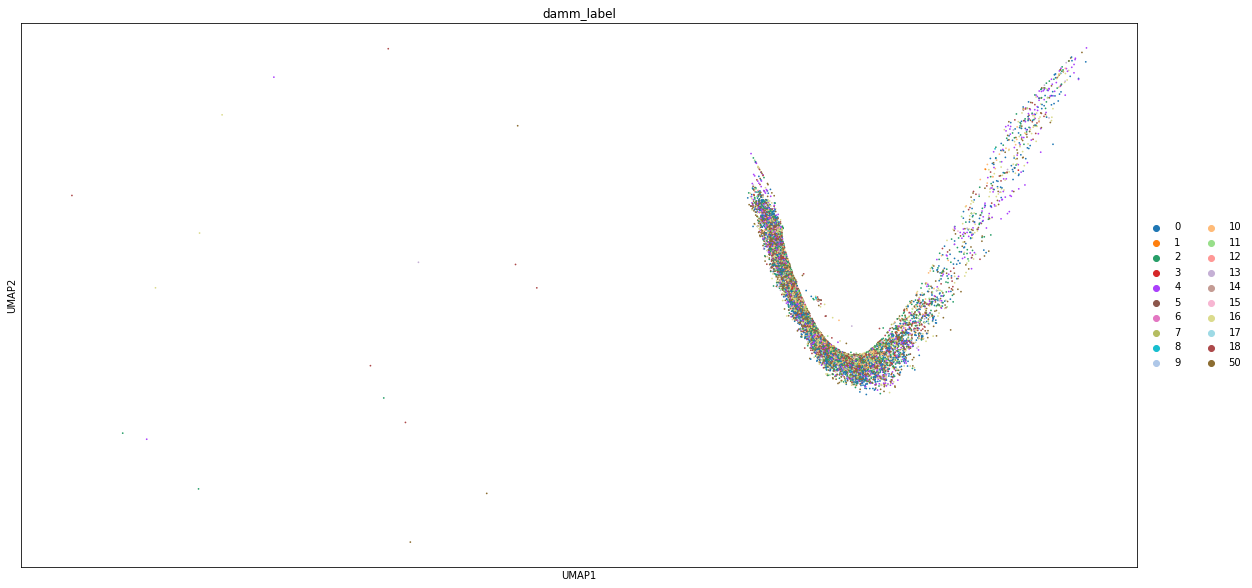

In [36]:
sc.pl.umap(tr_exp, color="pheno_label")
sc.pl.umap(tr_exp, color="fsom_label")
sc.pl.umap(tr_exp, color="kms_label")
sc.pl.umap(tr_exp, color="damm_label")

# New Correlation

In [37]:
def newMetric2(mat1, mat2, anti, pairs, thresholds, gp=1):
    out = []
    for pair in pairs:

        x_name = pair[0]; y_name = pair[1]
        #x = np.array(pheno_mat[x_name]); y = np.array(pheno_mat[y_name])
        #x = np.array(damm_mat[x_name]); y = np.array(damm_mat[y_name])
        x1 = np.array(mat1[x_name]); y1 = np.array(mat1[y_name])
        x2 = np.array(mat2[x_name]); y2 = np.array(mat2[y_name])
    
        if anti:
            ## case 1: negative
            score1 = sum((x1 < thresholds[x_name][0]) | (y1 < thresholds[y_name][0]))/len(x1)
            score2 = sum((x2 < thresholds[x_name][0]) | (y2 < thresholds[y_name][0]))/len(x2)
            out.append([x_name + '_' + y_name, score1, score2, 0])
        else:
            ## case 2: positive
            score1 = sum((x1 > thresholds[x_name][1]) | (y1 < thresholds[y_name][0]))/len(x1)
            score2 = sum((x2 > thresholds[x_name][1]) | (y2 < thresholds[y_name][0]))/len(x2)
            out.append([x_name + '_' + y_name, score1, score2, 1])
            
        print("{}_{} -- PG: {}; DAMM: {}".format(x_name, y_name, score1, score2))
        
        '''
        plt.scatter(x1, y1)
        plt.axvline(x=thresholds[x_name][0], color='r')
        plt.axvline(x=thresholds[x_name][1], color='r')    
        plt.axhline(y=thresholds[y_name][0], color='r')
        plt.axhline(y=thresholds[y_name][1], color='r')
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.title("PhenoGraph anti: {}".format(anti))
        plt.show()
        
        plt.scatter(x2, y2)
        plt.axvline(x=thresholds[x_name][0], color='r')
        plt.axvline(x=thresholds[x_name][1], color='r')    
        plt.axhline(y=thresholds[y_name][0], color='r')
        plt.axhline(y=thresholds[y_name][1], color='r')
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.title("DAMM anti: {}".format(anti))
        plt.show()
        '''
    if gp:
        out_col = ['pair', 'PhenoGraph', 'DAMM', 'type']
    else:
        out_col = ['pair', 'FlowSOM', 'DAMM', 'type']
    return pd.DataFrame(out, columns = out_col)

In [38]:
thresholds = pd.DataFrame(np.quantile(tr_exp[:,analysisProteins].X, [0.25, 0.75], axis=0), columns = pretty_printing[:-1])

In [39]:
thresholds

,bCatenin,cMyc,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,...,Twist,Vimentin,cPARP-cCasp3,mTOR,ERK,pHH3,p53,pS6,panCK,vWF
0,0.337608,0.130871,0.172412,0.070844,0.044444,2.699505,0.135830,0.075044,0.038832,0.160195,...,0.135571,0.028487,0.984396,0.180605,0.095558,0.164207,0.060149,0.121840,0.383095,0.378645
1,0.793778,0.455073,0.504354,0.243787,0.153267,8.658355,0.366318,0.267461,0.119369,0.764314,...,0.393638,0.410574,1.969739,0.409848,0.321970,0.421296,0.171444,0.498546,3.438618,0.831249


In [40]:
anti_pairs = [['CD3', 'CD20'], 
              ['CD3', 'CD68'], 
              ['CD3', 'panCK'], 
              ['CD3', 'vWF'],
              ['CD20', 'CD68'], 
              ['CD20', 'panCK'], 
              ['CD20', 'vWF'], 
              ['CD45', 'panCK'], 
              ['panCK', 'Vimentin']]
    
co_pairs = [['CD45', 'CD3'],
            ['CD45', 'CD20'],
            ['CD45', 'CD68'],
            ['panCK', 'CK5'],
            ['panCK', 'CK7'],
            ['panCK', 'CK8/18'],
            ['panCK', 'CK19']]

In [41]:
#!pip install --upgrade matplotlib>=3.3.4

In [42]:
pheno_mat = pd.DataFrame(pheno_centers, columns = pretty_printing)
damm_mat = pd.DataFrame(damm_centers, columns = pretty_printing)
anti = newMetric2(pheno_mat, damm_mat, 1, anti_pairs, thresholds, 1)
co = newMetric2(pheno_mat, damm_mat, 0, co_pairs, thresholds, 1)
df = pd.concat([anti, co])

CD3_CD20 -- PG: 0.0; DAMM: 0.10526315789473684
CD3_CD68 -- PG: 0.0; DAMM: 0.05263157894736842
CD3_panCK -- PG: 0.0; DAMM: 0.15789473684210525
CD3_vWF -- PG: 0.0; DAMM: 0.10526315789473684
CD20_CD68 -- PG: 0.0; DAMM: 0.10526315789473684
CD20_panCK -- PG: 0.0; DAMM: 0.10526315789473684
CD20_vWF -- PG: 0.0; DAMM: 0.10526315789473684
CD45_panCK -- PG: 0.0; DAMM: 0.15789473684210525
panCK_Vimentin -- PG: 0.0; DAMM: 0.2631578947368421
CD45_CD3 -- PG: 0.2631578947368421; DAMM: 0.2631578947368421
CD45_CD20 -- PG: 0.2631578947368421; DAMM: 0.2631578947368421
CD45_CD68 -- PG: 0.2631578947368421; DAMM: 0.2631578947368421
panCK_CK5 -- PG: 0.2631578947368421; DAMM: 0.42105263157894735
panCK_CK7 -- PG: 0.2631578947368421; DAMM: 0.47368421052631576
panCK_CK8/18 -- PG: 0.2631578947368421; DAMM: 0.5263157894736842
panCK_CK19 -- PG: 0.2631578947368421; DAMM: 0.47368421052631576


Text(0.5, 0.98, 'metabric: Correlation Alternative')

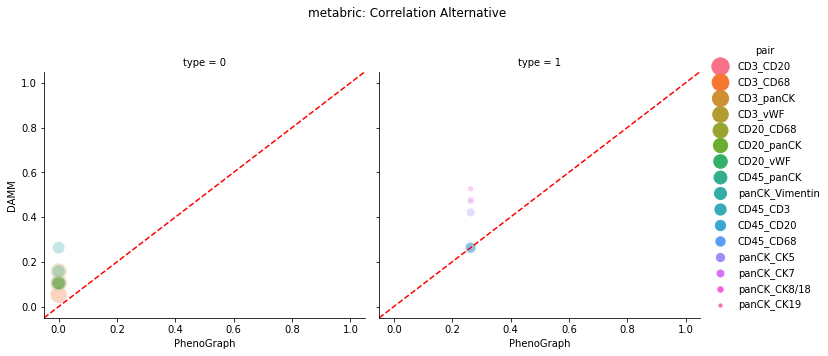

In [43]:
rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair', size="pair", sizes=(10, 300), alpha = 0.3)
#rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair')
for ax in rel.axes_dict.values():
    ax.axline((0, 0), (1,1), ls="--", color ='red')
#rel.data = df  # Hack needed to work around bug on v0.11, fixed in v0.12.dev
#rel.map(sns.lineplot, 'PhenoGraph', 'DAMM')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('{}: Correlation Alternative'.format(cohort))

In [44]:
fs_mat = pd.DataFrame(fs_centers, columns = pretty_printing)
anti = newMetric2(fs_mat, damm_mat, 1, anti_pairs, thresholds, 0)
co = newMetric2(fs_mat, damm_mat, 0, co_pairs, thresholds, 0)
df = pd.concat([anti, co]) 

CD3_CD20 -- PG: 0.05263157894736842; DAMM: 0.10526315789473684
CD3_CD68 -- PG: 0.05263157894736842; DAMM: 0.05263157894736842
CD3_panCK -- PG: 0.05263157894736842; DAMM: 0.15789473684210525
CD3_vWF -- PG: 0.05263157894736842; DAMM: 0.10526315789473684
CD20_CD68 -- PG: 0.05263157894736842; DAMM: 0.10526315789473684
CD20_panCK -- PG: 0.05263157894736842; DAMM: 0.10526315789473684
CD20_vWF -- PG: 0.05263157894736842; DAMM: 0.10526315789473684
CD45_panCK -- PG: 0.05263157894736842; DAMM: 0.15789473684210525
panCK_Vimentin -- PG: 0.0; DAMM: 0.2631578947368421
CD45_CD3 -- PG: 0.3684210526315789; DAMM: 0.2631578947368421
CD45_CD20 -- PG: 0.3684210526315789; DAMM: 0.2631578947368421
CD45_CD68 -- PG: 0.3684210526315789; DAMM: 0.2631578947368421
panCK_CK5 -- PG: 0.2631578947368421; DAMM: 0.42105263157894735
panCK_CK7 -- PG: 0.21052631578947367; DAMM: 0.47368421052631576
panCK_CK8/18 -- PG: 0.21052631578947367; DAMM: 0.5263157894736842
panCK_CK19 -- PG: 0.21052631578947367; DAMM: 0.47368421052631

Text(0.5, 0.98, 'metabric: Correlation Alternative')

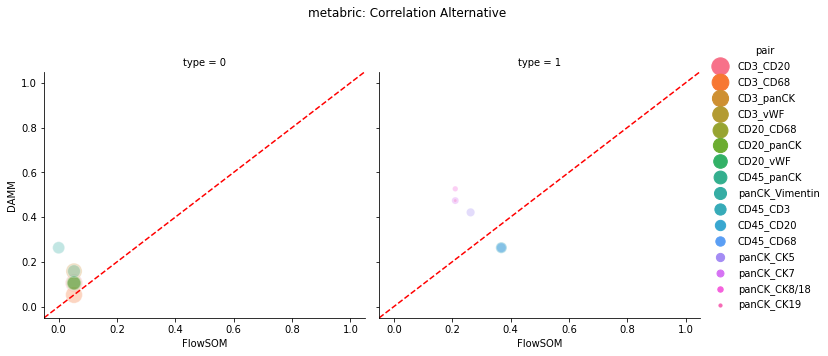

In [45]:
rel = sns.relplot(data=df, x='FlowSOM', y='DAMM', col='type', hue='pair', size="pair", sizes=(10, 300), alpha = 0.3)
#rel = sns.relplot(data=df, x='PhenoGraph', y='DAMM', col='type', hue='pair')
for ax in rel.axes_dict.values():
    ax.axline((0, 0), (1,1), ls="--", color ='red')
#rel.data = df  # Hack needed to work around bug on v0.11, fixed in v0.12.dev
#rel.map(sns.lineplot, 'PhenoGraph', 'DAMM')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('{}: Correlation Alternative'.format(cohort))

# ARS of PhenoGraph/FlowSOM/Kmeans/DAMM

In [46]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(tr_exp.obs['pheno_label'], tr_exp.obs['fsom_label'])

0.3473352947642976

In [47]:
adjusted_rand_score(tr_exp.obs['pheno_label'], tr_exp.obs['kms_label'])

0.39374401946892207

In [48]:
adjusted_rand_score(tr_exp.obs['pheno_label'], tr_exp.obs['damm_label'])

0.027836917934471104

In [49]:
adjusted_rand_score(tr_exp.obs['fsom_label'], tr_exp.obs['kms_label'])

0.4073661633310508

In [50]:
adjusted_rand_score(tr_exp.obs['fsom_label'], tr_exp.obs['damm_label'])

0.02545790640706714

In [51]:
adjusted_rand_score(tr_exp.obs['kms_label'], tr_exp.obs['damm_label'])

0.019907291005816008

# Cell sizes by cluster

<AxesSubplot:xlabel='cluster', ylabel='size'>

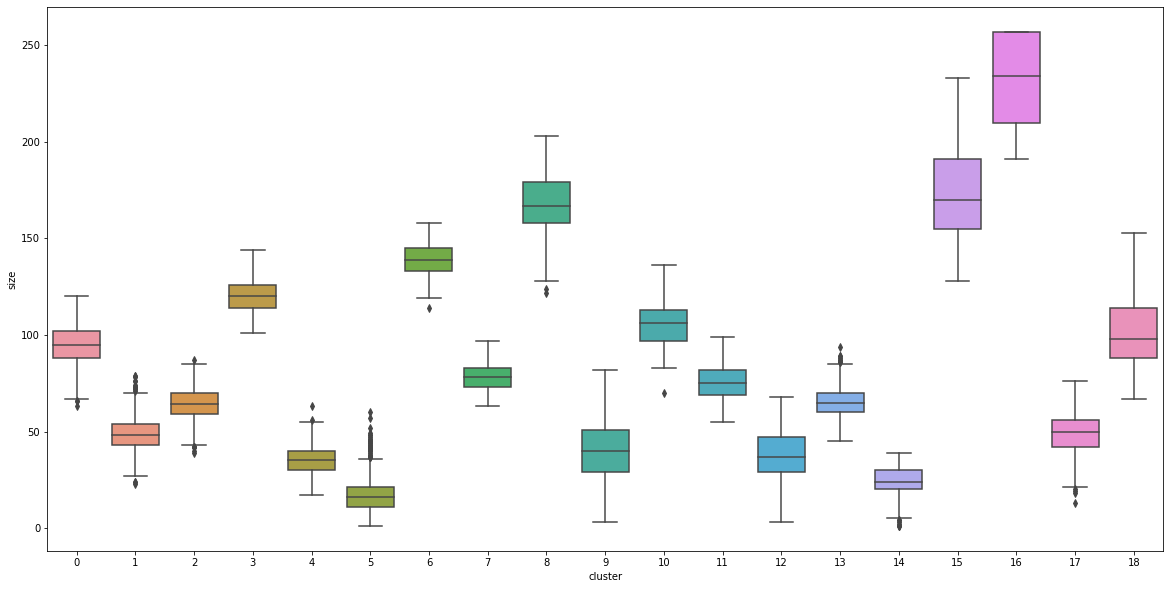

In [52]:
## phenograph
d1 = pd.DataFrame({'cluster': range(pheno_centers.shape[0]), 'psi': pheno_centers[:,-1]})
d2 = pd.DataFrame({'size': trS, 'cluster': pheno_labels})
d3 = d2.merge(d1, on='cluster')
sns.boxplot(x = 'cluster', y = 'size', data = d3)

<AxesSubplot:xlabel='cluster', ylabel='size'>

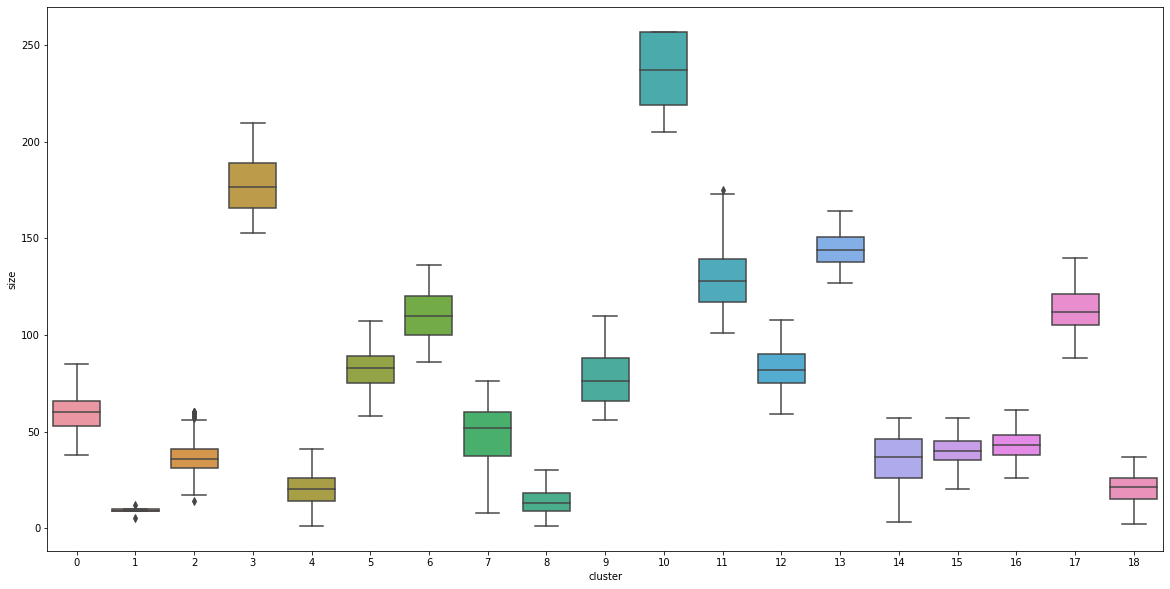

In [53]:
## FlowSOM
d1 = pd.DataFrame({'cluster': fsom_sorted_by_count, 'psi': fs_centers[:,-1]})
d2 = pd.DataFrame({'size': trS, 'cluster': fsom_labels})
d3 = d2.merge(d1, on='cluster')
sns.boxplot(x = 'cluster', y = 'size', data = d3)

<AxesSubplot:xlabel='cluster', ylabel='size'>

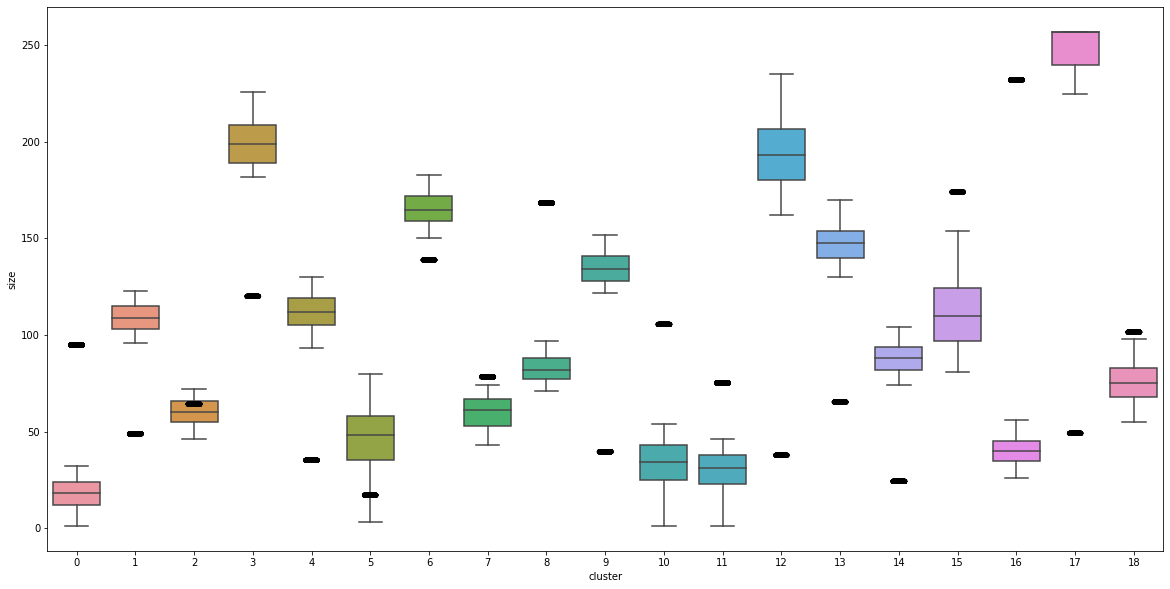

In [54]:
## kmeans
d1 = pd.DataFrame({'cluster': range(pheno_centers.shape[0]), 'psi': pheno_centers[:,-1]})
d2 = pd.DataFrame({'size': trS, 'cluster': okms_labels})
d3 = d2.merge(d1, on='cluster')

sns.stripplot(x = 'cluster', y = 'psi', data = d3, color = 'black')
sns.boxplot(x = 'cluster', y = 'size', data = d3)

<AxesSubplot:xlabel='cluster', ylabel='size'>

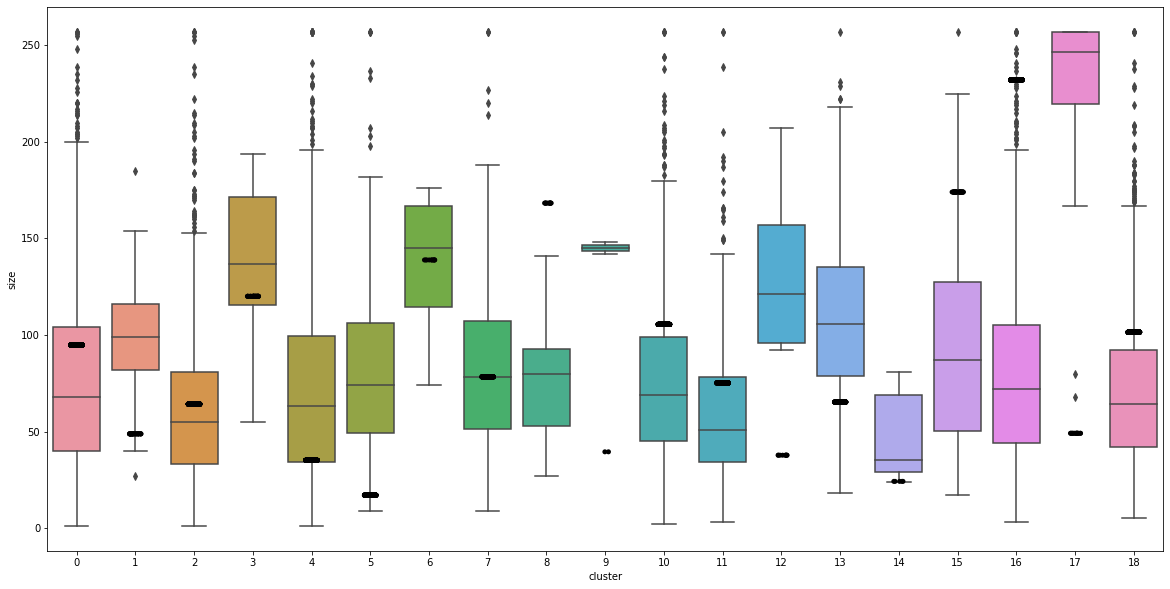

In [55]:
## damm
d1 = pd.DataFrame({'cluster': range(pheno_centers.shape[0]), 'psi': pheno_centers[:,-1]})
d2 = pd.DataFrame({'size': np.array(trS[damm_pred_singlet_label == 0]), 
                   'cluster': damm_pred_singlet_cluster_assig_label})
d3 = d2.merge(d1, on='cluster')

sns.stripplot(x = 'cluster', y = 'psi', data = d3, color = 'black')
sns.boxplot(x = 'cluster', y = 'size', data = d3)